In [15]:
import requests
import ssl

import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical

In [16]:
requests.packages.urllib3.disable_warnings()

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [18]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [19]:
network.compile(optimizer='rmsprop',\
                loss='categorical_crossentropy',\
                metrics=['accuracy'])

In [20]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [21]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.2609 - acc: 0.9243
Epoch 2/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.1063 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0697 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.0509 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0388 - acc: 0.9882


In [23]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 39us/step
test_acc: 0.9775


In [29]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

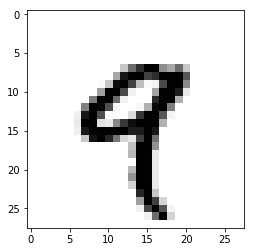

In [30]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()